<h2>Install the necessary libraries and load the dataset</h2>

In [1]:
!pip install pandas numpy matplotlib seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Vader Dataset/Vader Dataset/Vader Dataset/train.csv")
dev = pd.read_csv("Vader Dataset/Vader Dataset/Vader Dataset/dev.csv")

<h2>Analyze the training set</h2>

In [4]:
df.head()

,desc_id,source_name,review_text,is_accessibility,cleanText,Vader Score,Vader Sentiment
0,1,gp_AOqpTOE-4PtpSwSKzv8CF6EtR6seFSLwg-QQPTpQKze...,Excellent app. Been using it for years on man...,Accessibility Review,excellent app using years many different phone...,0.8807,Positive
1,1,gp_AOqpTOGPKJI_1QuwFgSTcvd7BanaHdhJoLUXZDx8OVt...,I've used this on a different phone - but cur...,Accessibility Review,used different phone currently moto android re...,0.8271,Positive
2,1,lg_AOqpTOE5_m1p9SEdAbCNs_Nh_qN7EHMLnyPnytEW9NX...,Fantastic program! Instant search results and...,Accessibility Review,fantastic program instant search results fast ...,0.9670,Positive
3,1,lg_AOqpTOEyZAX-Z1qAqVvbqV8s6vJAttZvFBFixQTM_jW...,I'm using this on my mobile as well as on PC ...,Accessibility Review,using mobile well view offline dictionaries us...,0.9169,Positive
4,1,gp_AOqpTOE6SfnT_RCAb9w8AbMpASAbJDvsJIHxp_xuhKg...,Text reflow doesn't work. I want my money back...,Accessibility Review,text reflow work want money back,0.0772,Positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   desc_id           1985 non-null   int64  
 1   source_name       1985 non-null   object 
 2   review_text       1984 non-null   object 
 3   is_accessibility  1985 non-null   object 
 4   cleanText         1982 non-null   object 
 5   Vader Score       1985 non-null   float64
 6   Vader Sentiment   1985 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 108.7+ KB


In [6]:
df.describe()

,desc_id,Vader Score
count,1985.0,1985.000000
mean,1.0,0.490518
std,0.0,0.429758
min,1.0,-0.930000
25%,1.0,0.250000
50%,1.0,0.624900
75%,1.0,0.836000
max,1.0,0.989900


(array([ 20.,  38.,  59.,  55., 223.,  88., 185., 261., 463., 593.]),
 array([-0.93   , -0.73801, -0.54602, -0.35403, -0.16204,  0.02995,
         0.22194,  0.41393,  0.60592,  0.79791,  0.9899 ]),
 <BarContainer object of 10 artists>)

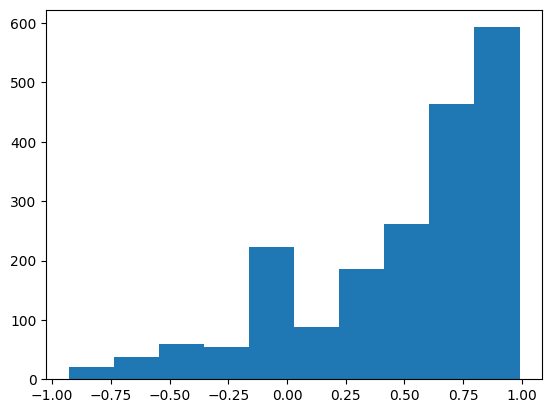

In [7]:
plt.hist(df['Vader Score'])

(array([1590.,    0.,    0.,    0.,    0.,  214.,    0.,    0.,    0.,
         181.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

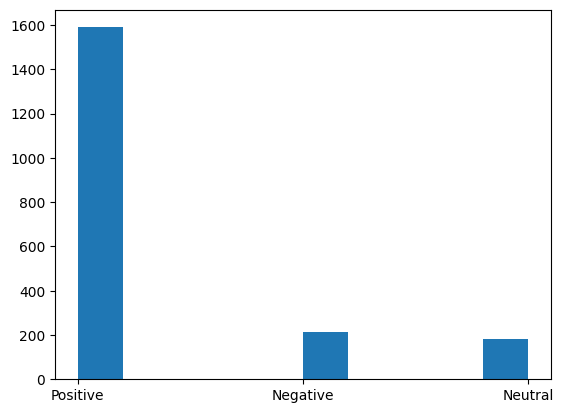

In [8]:
plt.hist(df['Vader Sentiment'])

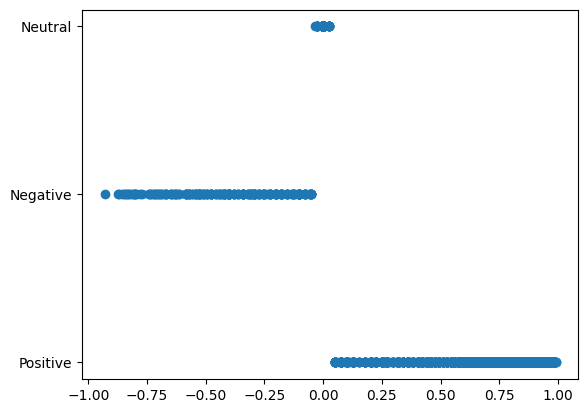

In [9]:
plt.scatter(df['Vader Score'], df['Vader Sentiment'])

<h1>Preprocess</h1>

all preprocessing steps will be applied to both datasets

<h3>1. remove all neutral occurences from df</h3>

In [10]:
df.drop(df[df['Vader Sentiment'] == 'Neutral'].index, inplace = True)

# df = pd.concat([df[df['Vader Sentiment'] == "Positive"].sample(frac=0.12), df[df['Vader Sentiment'] == "Negative"]])

<h3>2. convert the vander sentiment to a numerical value</h3>

In [11]:
df.replace({'Positive': 1, 'Negative': 0}, inplace=True)

/tmp/ipykernel_4981/2350983691.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Positive': 1, 'Negative': 0}, inplace=True)


<h3>3. delete irrelevant columns</h3>

In [12]:
try:
    df.drop(['desc_id', 'source_name', 'review_text', 'is_accessibility',
       'cleanText' ], axis=1, inplace=True)
except:
    pass


try:
    indexes = dev['desc_id']
    dev.drop(['desc_id', 'source_name', 'review_text', 'is_accessibility',
       'cleanText' ], axis=1, inplace=True)
except:
    pass

<h3>4. shuffle and split df to train and val</h3>

In [13]:
df = df.sample(frac= 1)
split = 0.7
train = df.iloc[:int(df.shape[0]*0.7),:]
val = df.iloc[int(df.shape[0]*0.7):,:]

In [24]:
print(train.shape)
val.shape

(1262, 2)


(542, 2)

<h1>Create the model</h1>

In [14]:
class logistic_regression:
    def __init__(self, n: int):
        self.n = n
        self.w = np.zeros(shape = (n,1), dtype=float)
        self.b = 0

    def sigmoid(self, x: np.array):
        return 1/(1+np.exp(-x))

    def loss(self, y_true: np.array, y_pred: np.array):
        y_true = y_true.squeeze()
        y_pred = y_pred.squeeze()

        return -1*np.average(y_true*np.log(y_pred)+ (1-y_true)*np.log(1-y_pred))

    def predict(self, X:pd.Series):
        X = np.array(X, ndmin = 2)

        z = self.w.T @ X + self.b
        a = self.sigmoid(z)
        prediction = (a >= 0.5)
        # print(np.sum(prediction))
        return prediction

    def accuracy(self, y_true: np.array, y_pred: np.array):
        # print(y_pred - y_true)
        return (np.average(y_true == y_pred))
        

    def fit(self, X: pd.Series, y: pd.Series, X_val: pd.Series, y_val: pd.Series, epochs:int, learning_rate = 0.001):
        X = np.array(X, ndmin = 2)
        y = np.array(y)

        X_val = np.array(X_val, ndmin = 2)
        y_val = np.array(y_val)

        history = {
            'train': {
                'accuracy': [],
                'loss': []
            },
            'val': {
                'accuracy': [],
               'loss': []
            }
        }


        for i in range(epochs):
            # print(i)
            z = self.w.T @ X + self.b
            # print(z)
            a = self.sigmoid(z) # also the prediction
            # print(a)
            J_train = self.loss(y, a)
            # print(J_train)
            history['train']['loss'].append(J_train.item())

            train_acc = self.accuracy(y, self.predict(X))
            history['train']['accuracy'].append(train_acc)

            dz = a - y
            # print(dz)
            dw = np.average(X @ dz.T,axis=0)
            # print(dw)
            db = np.average(dz.T, axis=0)
            # print(db)
            

            self.w -= learning_rate*dw
            self.b -= learning_rate*db

            z_val = self.w.T @ X_val + self.b
            a_val = self.sigmoid(z_val) # also the prediction
            J_val = self.loss(y_val, a_val)
            history['val']['loss'].append(J_val.item())

            val_acc = self.accuracy(y_val, self.predict(X_val))
            history['val']['accuracy'].append(val_acc)
        return history

            
                       

            
        

In [15]:
t = logistic_regression(1)

In [16]:
h = t.fit(train['Vader Score'], train['Vader Sentiment'], val['Vader Score'], val['Vader Sentiment'],  10)

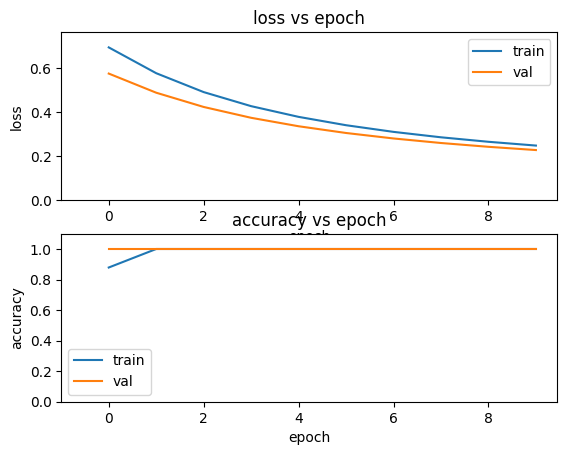

In [17]:
plt.subplot(2, 1,1)
plt.plot(h['train']['loss'], label="train")
plt.plot(h['val']['loss'], label="val")
plt.xlabel("epoch")
plt.xlim(-1)
plt.ylabel("loss")
plt.ylim(0, max(h['train']['loss'])*1.1)
plt.title("loss vs epoch")
plt.legend()

plt.subplot(2, 1,2)
plt.plot(h['train']['accuracy'], label="train")
plt.plot(h['val']['accuracy'], label="val")
plt.ylim(0, max(h['train']['accuracy'])*1.1)
plt.xlim(-1)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("accuracy vs epoch")
plt.legend()

plt.show()

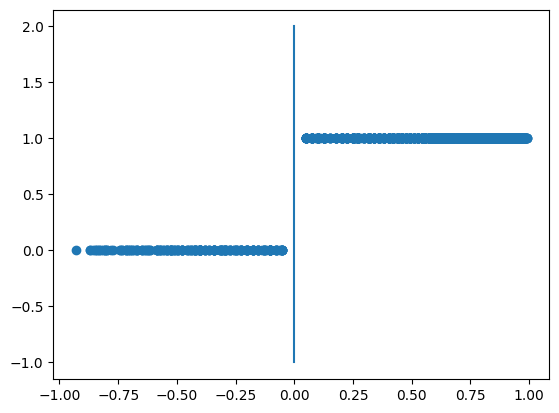

In [35]:
w = t.w[0].item()
b = t.b.item()
breaking_x = -b/w
p1 = [breaking_x, breaking_x] # the x's
p2 = [-1, 2] # the y's
plt.scatter(df['Vader Score'], df['Vader Sentiment'])

plt.plot(p1, p2, label="discriminative line")
plt.show()

In [34]:
print(w)
print(b)
print(breaking_x)
print(breaking_x*w+b)

2.34656897909445
0.002280638958398655
0.2121051481868959
0.5


<h1>Notes: </h1>
- try smote
- try cross-validation
- add the other metrics